<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.802349,58.658582,46.513939,498.155837,652.130706,199.101117,453.029589
1,0.0,1.0,24.100433,47.493504,86.218280,379.253215,547.065433,81.341521,465.723912
2,0.0,2.0,63.108570,29.005167,73.332879,-31.851823,143.594793,124.011117,19.583676
3,0.0,3.0,91.776663,26.059987,23.411637,103.961317,255.209605,255.256791,-0.047186
4,0.0,4.0,58.606194,48.968042,67.183011,-574.144516,-389.387268,165.521077,-554.908346
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.582027,39.764749,33.991134,1077.013814,1238.351724,0.550968,1237.800756
249996,999.0,246.0,65.752222,37.838419,59.722296,-496.757984,-323.445047,174.059774,-497.504821
249997,999.0,247.0,35.940886,66.748539,24.947292,1326.468098,1464.104815,76.309504,1387.795310
249998,999.0,248.0,56.520357,88.021783,23.209092,-2250.673336,-2072.922103,20.969751,-2093.891854


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.802349,58.658582,46.513939,498.155837,652.130706,199.101117,453.029589
1,0.0,1.0,24.100433,47.493504,86.218280,379.253215,547.065433,81.341521,465.723912
2,0.0,2.0,63.108570,29.005167,73.332879,-31.851823,143.594793,124.011117,19.583676
3,0.0,3.0,91.776663,26.059987,23.411637,103.961317,255.209605,255.256791,-0.047186
4,0.0,4.0,58.606194,48.968042,67.183011,-574.144516,-389.387268,165.521077,-554.908346
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.582027,39.764749,33.991134,1077.013814,1238.351724,0.550968,1237.800756
249996,999.0,246.0,65.752222,37.838419,59.722296,-496.757984,-323.445047,174.059774,-497.504821
249997,999.0,247.0,35.940886,66.748539,24.947292,1326.468098,1464.104815,76.309504,1387.795310
249998,999.0,248.0,56.520357,88.021783,23.209092,-2250.673336,-2072.922103,20.969751,-2093.891854


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.802349,58.658582,46.513939,498.155837,652.130706,199.101117,453.029589
1,0.0,1.0,24.100433,47.493504,86.218280,379.253215,547.065433,81.341521,465.723912
2,0.0,2.0,63.108570,29.005167,73.332879,-31.851823,143.594793,124.011117,19.583676
3,0.0,3.0,91.776663,26.059987,23.411637,103.961317,255.209605,255.256791,-0.047186
4,0.0,4.0,58.606194,48.968042,67.183011,-574.144516,-389.387268,165.521077,-554.908346
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.582027,39.764749,33.991134,1077.013814,1238.351724,0.550968,1237.800756
249996,999.0,246.0,65.752222,37.838419,59.722296,-496.757984,-323.445047,174.059774,-497.504821
249997,999.0,247.0,35.940886,66.748539,24.947292,1326.468098,1464.104815,76.309504,1387.795310
249998,999.0,248.0,56.520357,88.021783,23.209092,-2250.673336,-2072.922103,20.969751,-2093.891854


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

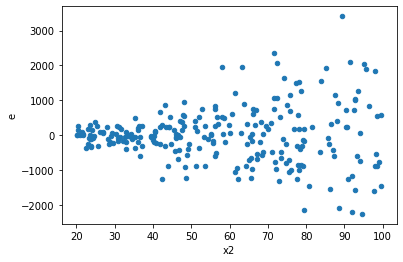

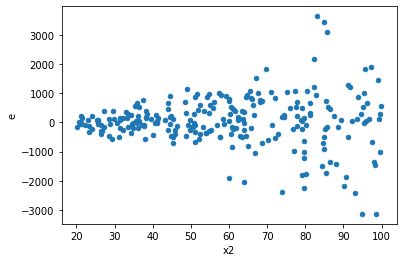

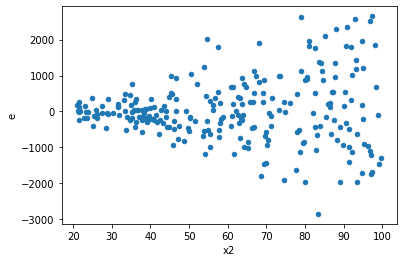

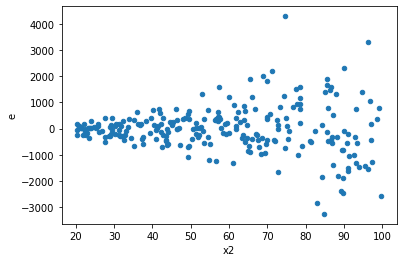

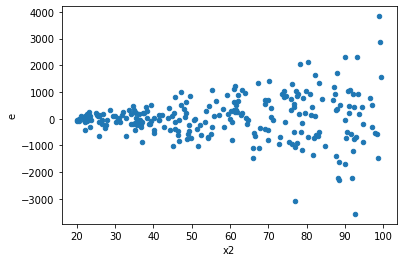

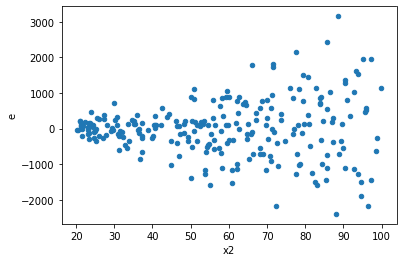

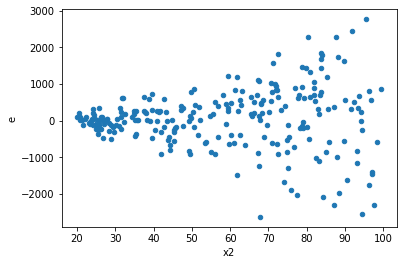

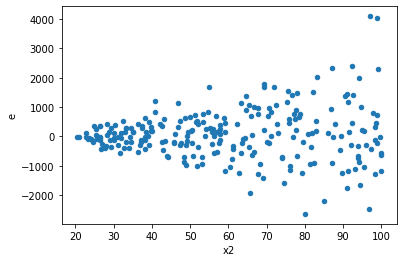

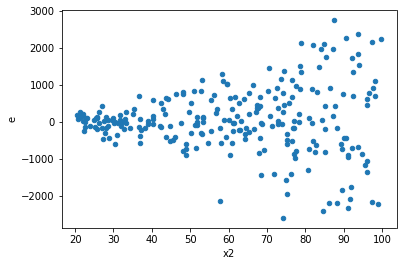

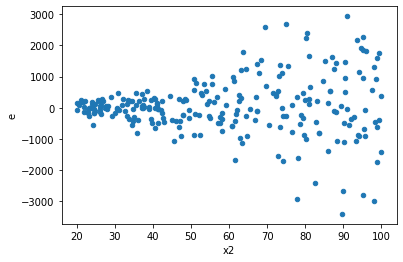

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,30452790.36057207,100551146.23345475,313946.29237703164,1036609.7549840696,3.301869715152298,1.157957685293809e-08,0.9999999942102116,5.789788426469045e-09,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,68812321.51204765,80803589.55817471,709405.3764128623,833026.696476028,1.1742604781038761,0.4303489802514855,0.7848255098742573,0.21517449012574275,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,23303500.932506785,144649837.50734255,240242.27765470912,1491235.4382200262,6.207214869829535,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,15956161.401194487,124462460.65829879,164496.5092906648,1283118.1511164824,7.800275863904302,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,49161183.739699125,78754248.35417633,506816.32721339306,811899.4675688281,1.6019599684817987,0.02122226550968387,0.9893888672451581,0.010611132754841934,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,36038729.48603576,87865823.36271454,371533.2936704717,905833.2305434489,2.438094367249009,1.645513296866241e-05,0.9999917724335157,8.227566484331206e-06,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,35245945.81769743,118751647.34083037,363360.2661618292,1224243.7870188698,3.3692285619188485,6.747416181340782e-09,0.9999999966262919,3.373708090670391e-09,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,36332919.50825909,123062408.44994499,374566.18049751635,1268684.6231953092,3.387077342407643,5.85179438239436e-09,0.9999999970741028,2.92589719119718e-09,Reject005=0 : Heteroscedasticity
9.0,97.0,97.0,16884687.65338745,160135999.65302646,174068.94488028297,1650886.5943610976,9.484096060308204,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,30452790.36057207,100551146.23345475,313946.29237703164,1036609.7549840696,3.301869715152298,1.157957685293809e-08,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,68812321.51204765,80803589.55817471,709405.3764128623,833026.696476028,1.1742604781038761,0.4303489802514855,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,23303500.932506785,144649837.50734255,240242.27765470912,1491235.4382200262,6.207214869829535,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,72636122.99543273,61393260.39649166,748826.0102621932,632920.21027311,0.8452166479253304,0.4090950512252999,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,15956161.401194487,124462460.65829879,164496.5092906648,1283118.1511164824,7.800275863904302,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,49161183.739699125,78754248.35417633,506816.32721339306,811899.4675688281,1.6019599684817987,0.02122226550968387,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,36038729.48603576,87865823.36271454,371533.2936704717,905833.2305434489,2.438094367249009,1.645513296866241e-05,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,35245945.81769743,118751647.34083037,363360.2661618292,1224243.7870188698,3.3692285619188485,6.747416181340782e-09,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,36332919.50825909,123062408.44994499,374566.18049751635,1268684.6231953092,3.387077342407643,5.85179438239436e-09,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    754
Reject005=1 : Homoscedasticity      246
Name: Result_test, dtype: int64